In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [25]:
names = []
with open("labels.txt", "r") as r:
    names = r.read().strip().split("\n")
    
df = pd.read_csv("wine.data", names=names)
df.head()

Class  Alcohol  Malic acid   Ash  Alcalinity of ash    Magnesium  \
0      1    14.23        1.71  2.43                 15.6        127   
1      1    13.20        1.78  2.14                 11.2        100   
2      1    13.16        2.36  2.67                 18.6        101   
3      1    14.37        1.95  2.50                 16.8        113   
4      1    13.24        2.59  2.87                 21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [26]:
[v.value_counts() for k, v in  df.items()]

[2    71
 1    59
 3    48
 Name: Class, dtype: int64,
 13.05    6
 12.37    6
 12.08    5
 12.29    4
 12.42    3
         ..
 13.72    1
 13.29    1
 13.74    1
 13.77    1
 14.13    1
 Name: Alcohol, Length: 126, dtype: int64,
 1.73    7
 1.67    4
 1.81    4
 1.68    3
 1.61    3
        ..
 1.09    1
 1.19    1
 1.17    1
 1.01    1
 4.10    1
 Name: Malic acid, Length: 133, dtype: int64,
 2.30    7
 2.28    7
 2.70    6
 2.32    6
 2.36    6
        ..
 2.16    1
 2.53    1
 1.75    1
 1.71    1
 2.37    1
 Name: Ash, Length: 79, dtype: int64,
 20.0    15
 16.0    11
 21.0    11
 18.0    10
 19.0     9
         ..
 12.4     1
 17.1     1
 16.4     1
 16.3     1
 27.0     1
 Name: Alcalinity of ash  , Length: 63, dtype: int64,
 88     13
 86     11
 98      9
 101     9
 96      8
 102     7
 94      6
 85      6
 112     6
 97      5
 92      5
 80      5
 103     5
 89      5
 90      4
 108     4
 107     4
 106     4
 87      3
 120     3
 95      3
 78      3
 111     3
 84  

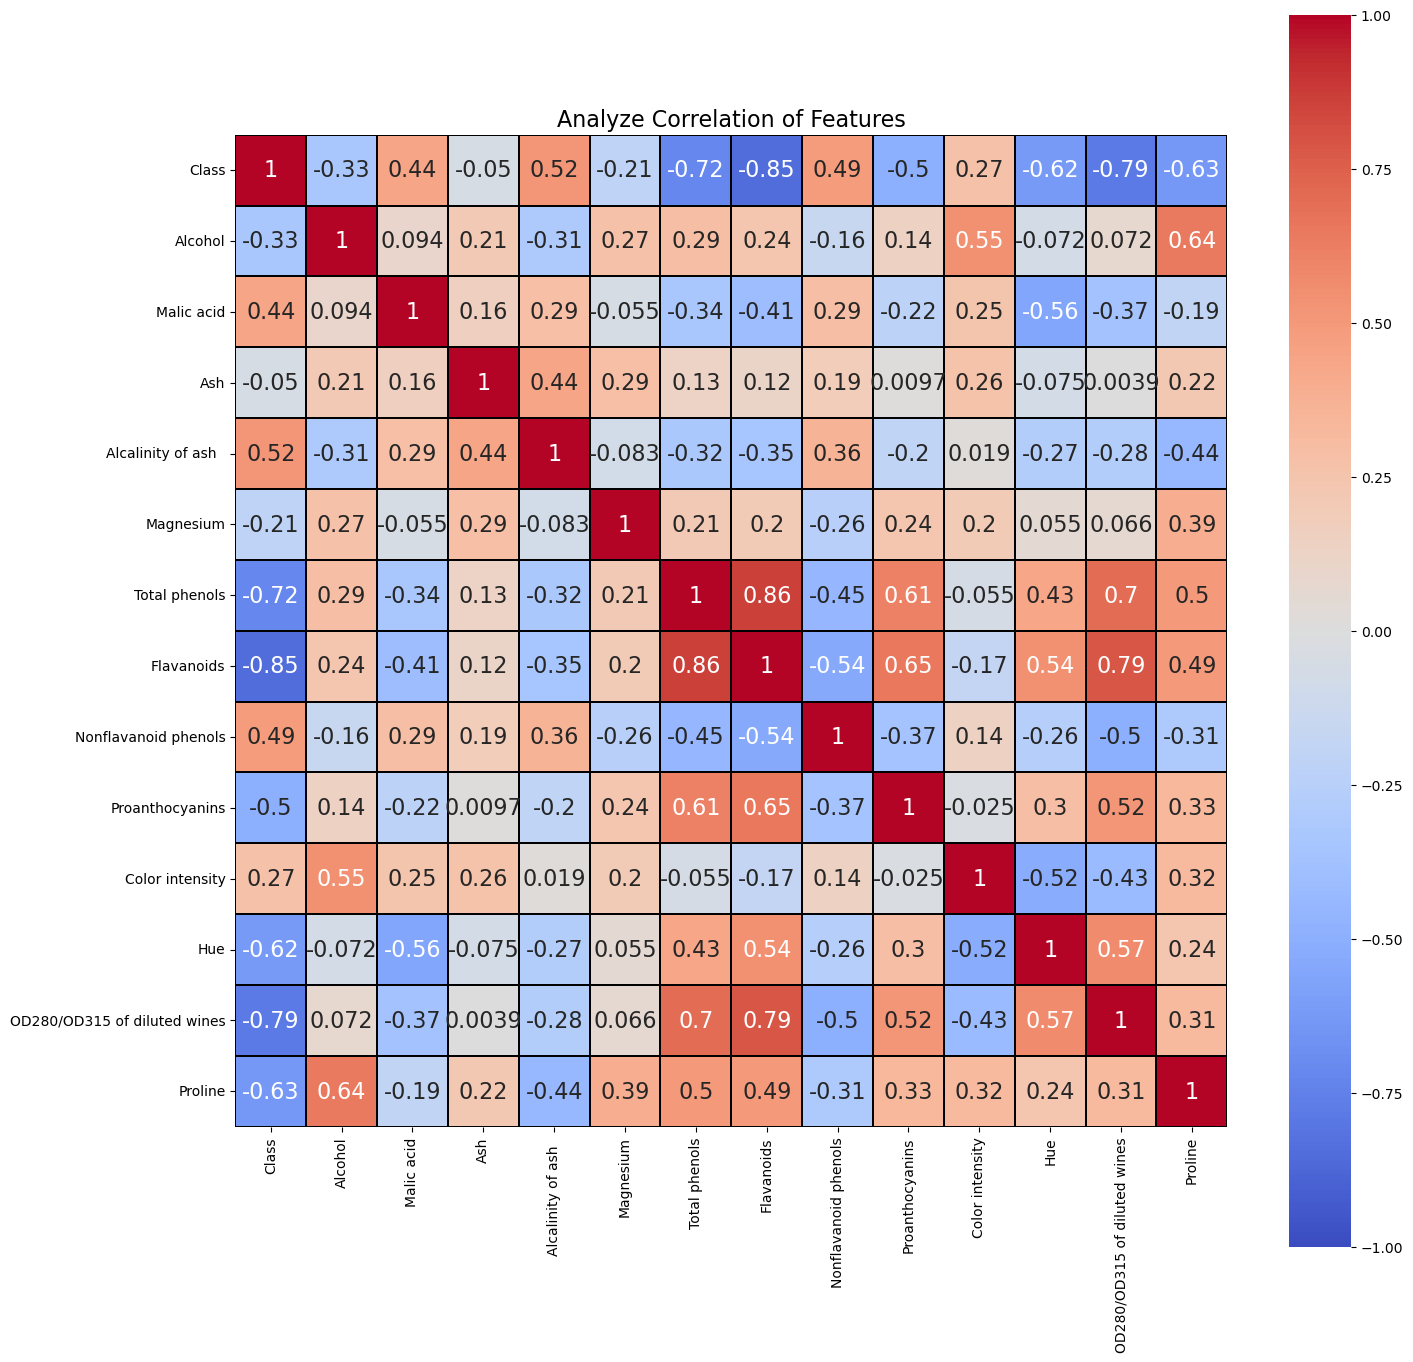

In [27]:
colormap = plt.cm.coolwarm
df_num_class = df
# df_num_class.Class = pd.Categorical(df.Class).codes
plt.figure(figsize=(16, 16))
plt.title("Analyze Correlation of Features", y = 1.0, size = 16)
sns.heatmap(df_num_class.astype(float).corr(), linewidths = 0.1, vmin=-1., vmax = 1.,
           square = True, cmap = colormap, linecolor = "black", annot = True, annot_kws = {"size" : 16})
plt.show()

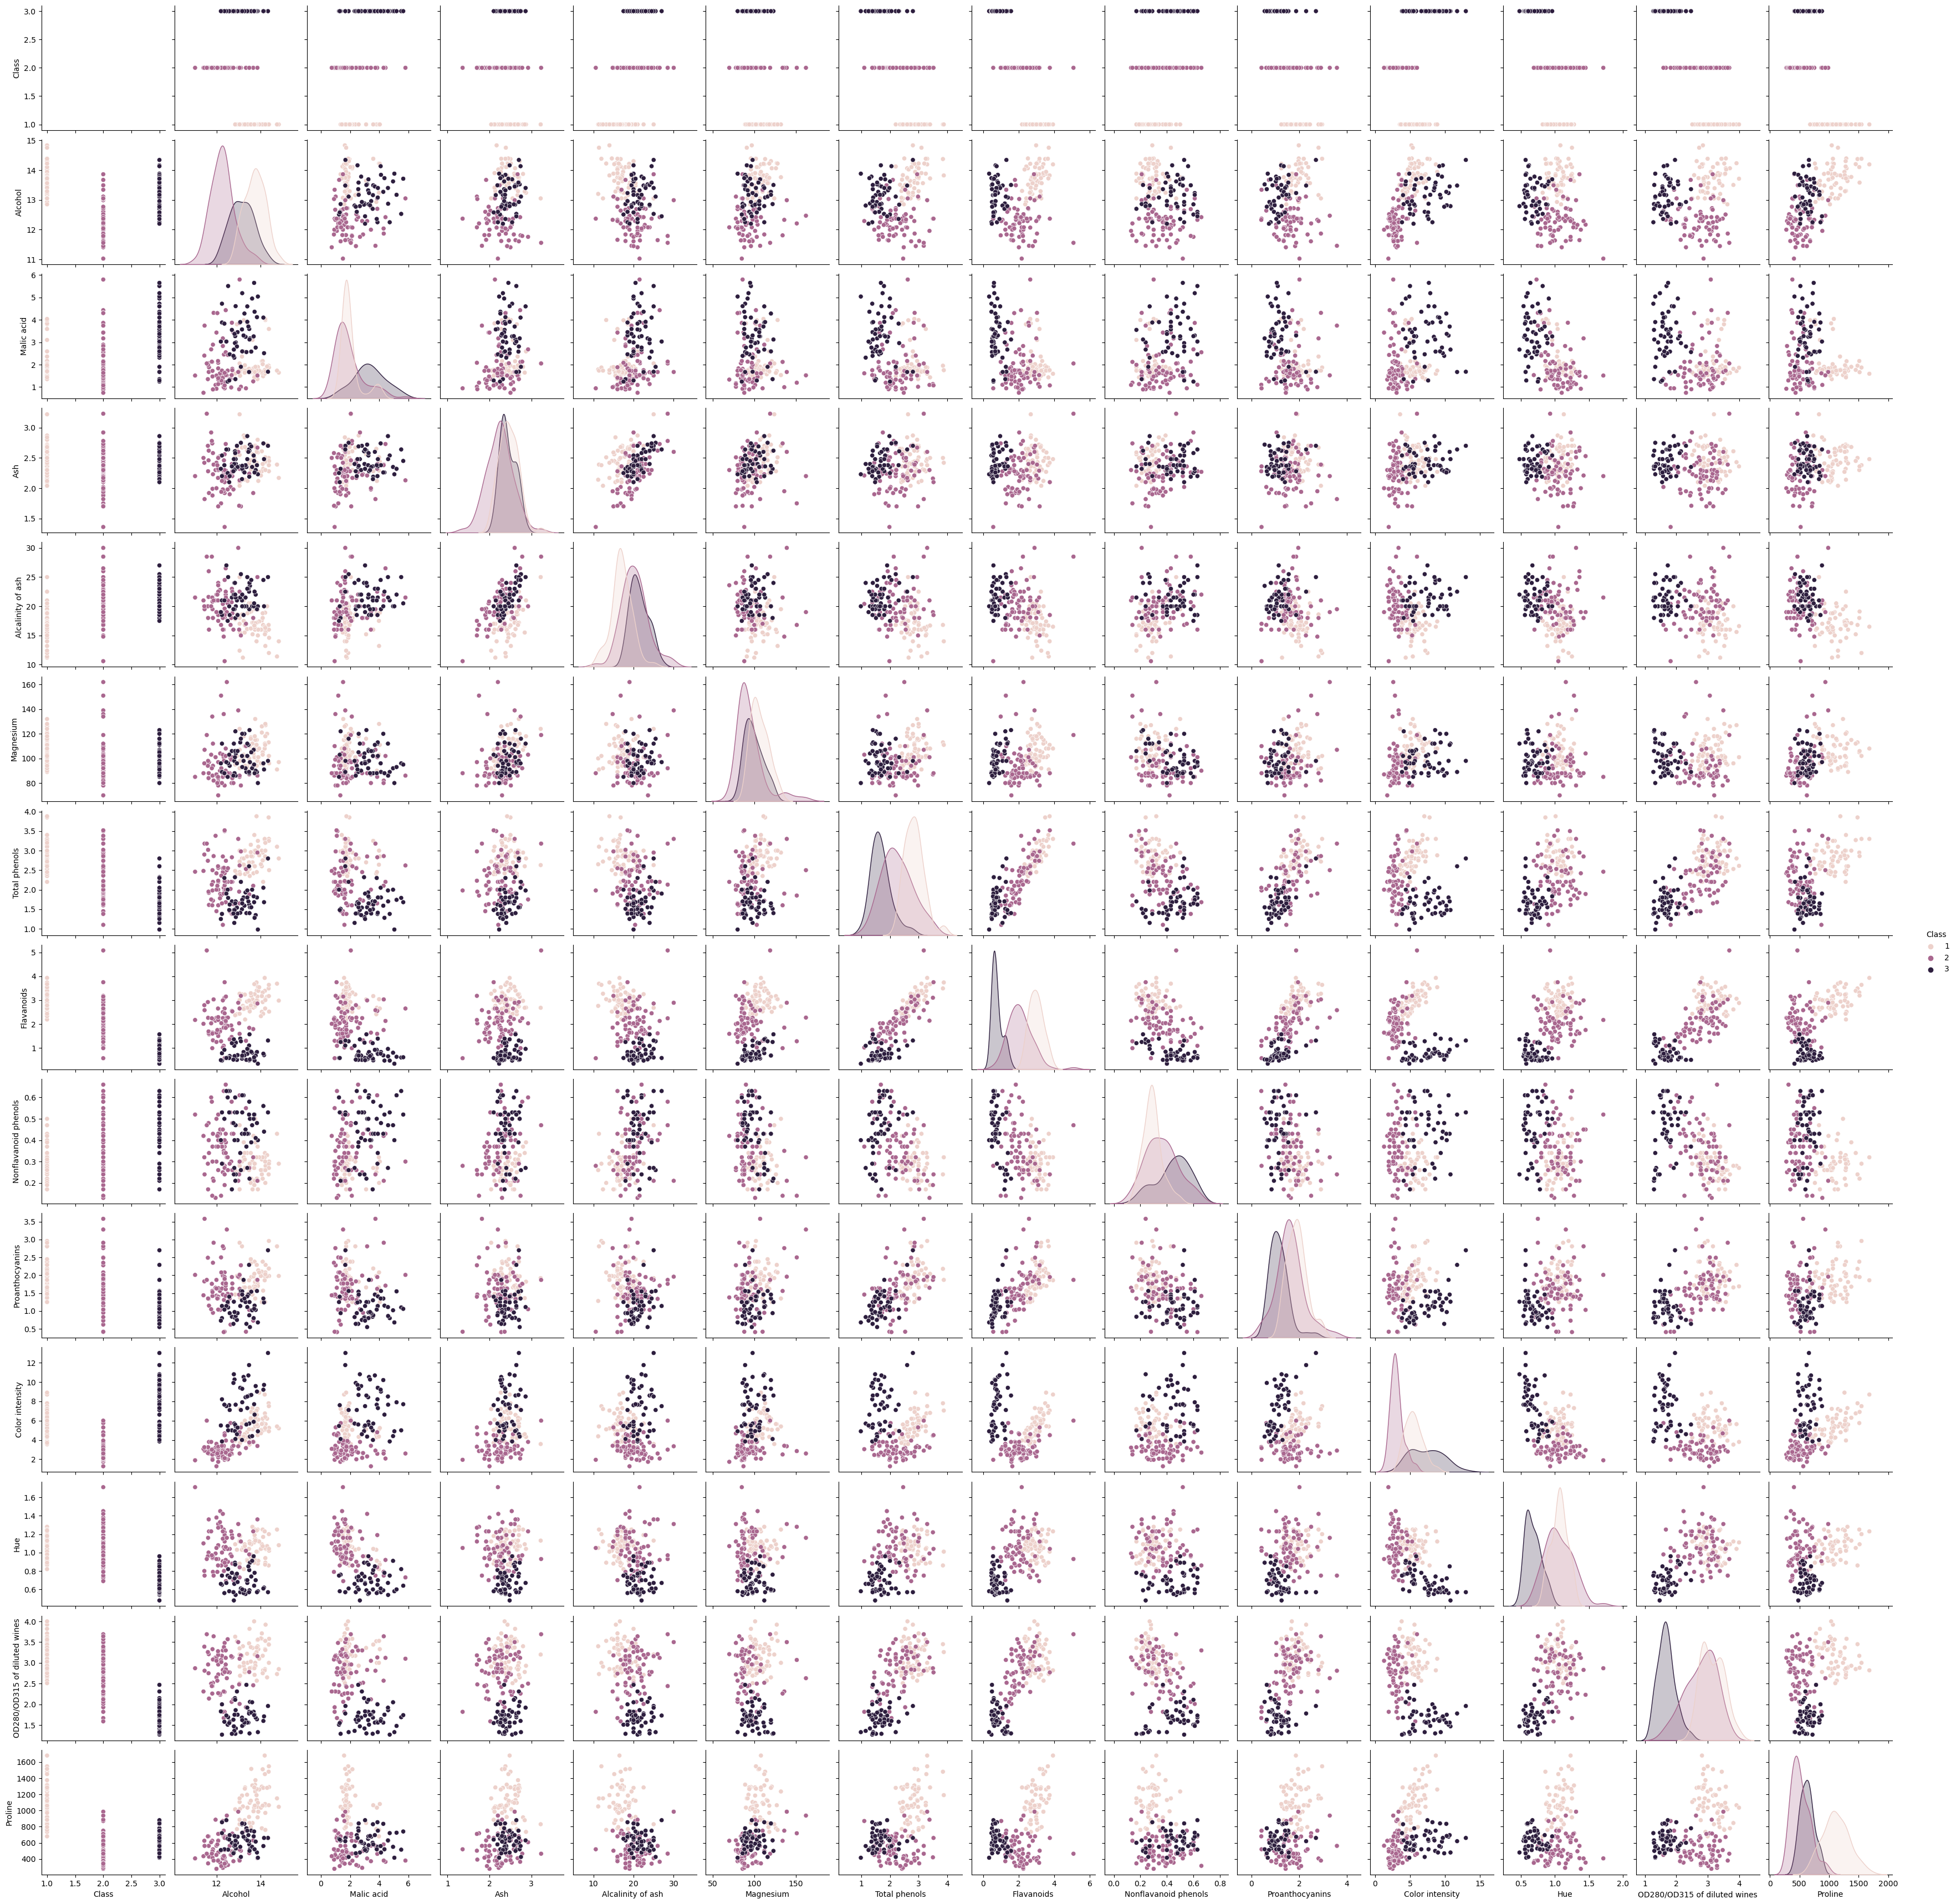

In [28]:
sns.pairplot(df_num_class,
             vars=df_num_class.keys(),
            hue ='Class')
plt.show()

In [35]:
x = df
x.drop(columns=['Class'], axis=1)
y = df.Class


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((133, 14), (45, 14), (133,), (45,))

In [38]:
x_train

Class  Alcohol  Malic acid   Ash  Alcalinity of ash    Magnesium  \
19       1    13.64        3.10  2.56                 15.2        116   
135      3    12.60        2.46  2.20                 18.5         94   
74       2    11.96        1.09  2.30                 21.0        101   
144      3    12.25        3.88  2.20                 18.5        112   
16       1    14.30        1.92  2.72                 20.0        120   
..     ...      ...         ...   ...                  ...        ...   
103      2    11.82        1.72  1.88                 19.5         86   
67       2    12.37        1.17  1.92                 19.6         78   
117      2    12.42        1.61  2.19                 22.5        108   
47       1    13.90        1.68  2.12                 16.0        101   
172      3    14.16        2.51  2.48                 20.0         91   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
19            2.70        3.03                  0.17             1.66   
135           1.62        0.66                  0.63             0.94   
74            3.38        2.14                  0.13             1.65   
144           1.38        0.78                  0.29             1.14   
16            2.80        3.14                  0.33             1.97   
..             ...         ...                   ...              ...   
103           2.50        1.64                  0.37             1.42   
67            2.11        2.00                  0.27             1.04   
117           2.00        2.09                  0.34             1.61   
47            3.10        3.39                  0.21             2.14   
172           1.68        0.70                  0.44             1.24   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
19              5.10  0.96                          3.36      845  
135             7.10  0.73                          1.58      695  
74              3.21  0.99                          3.13      886  
144             8.21  0.65                          2.00      855  
16              6.20  1.07                          2.65     1280  
..               ...   ...                           ...      ...  
103             2.06  0.94                          2.44      415  
67              4.68  1.12                          3.48      510  
117             2.06  1.06                          2.96      345  
47              6.10  0.91                          3.33      985  
172             9.70  0.62                          1.71      660  

[133 rows x 14 columns]

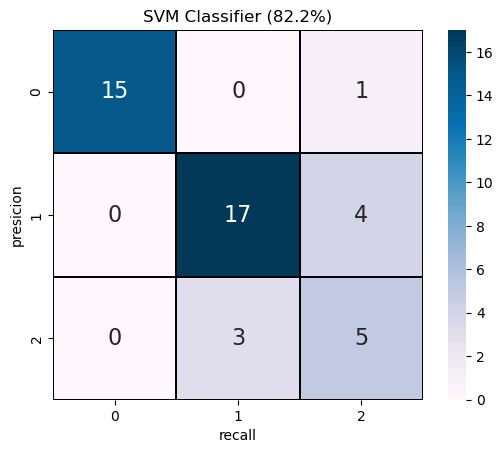

In [84]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

def estimate_model(model, name, x_test, y_test):
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    conf_matr = confusion_matrix(y_test, pred)
    colormap = plt.cm.PuBu
    plt.title(f"{name} ({accuracy*100:.1f}%)")
    sns.heatmap(conf_matr, linewidths = 0.1,
            square = True, cmap = colormap, linecolor = "black", annot = True, annot_kws = {"size" : 16, })

    plt.xlabel("recall")
    plt.ylabel("presicion")
    plt.show()
clf_svm = SVC(random_state=0)
clf_svm.fit(x_train, y_train)

estimate_model(clf_svm, "SVM Classifier", x_test, y_test)

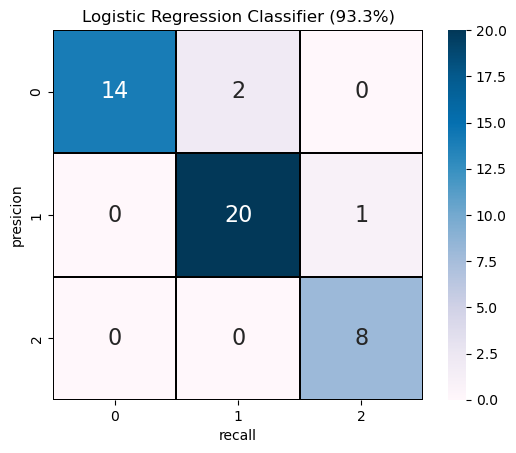

In [85]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(x_train, y_train)

estimate_model(clf_lr, "Logistic Regression Classifier", x_test, y_test)

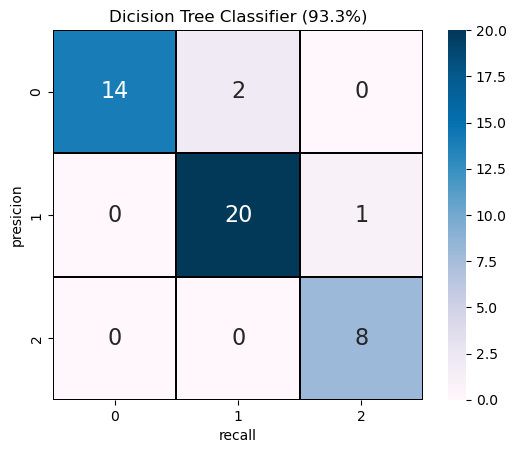

In [86]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_train, y_train)

estimate_model(clf_lr, "Dicision Tree Classifier", x_test, y_test)

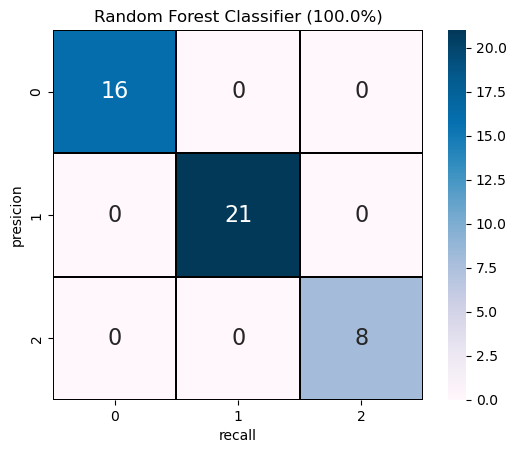

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
estimate_model(rf_clf, "Random Forest Classifier", x_test, y_test)

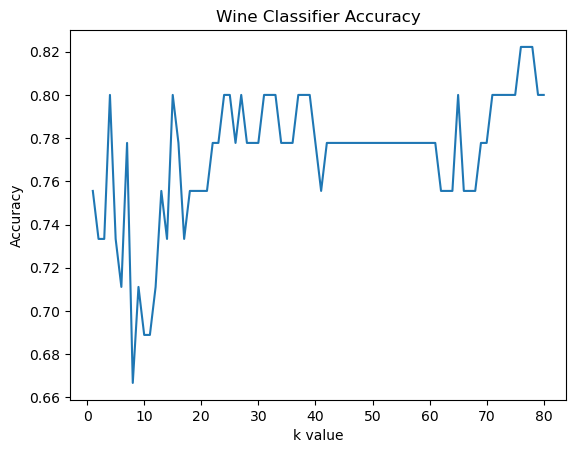

In [99]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 81)
find_accuracy = []

for k in k_range:
    find_model = KNeighborsClassifier(n_neighbors = k)
    find_model.fit(x_train, y_train.values.ravel())

    find_accuracy.append(find_model.score(x_test.values, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Wine Classifier Accuracy")
plt.show()